### PROBLEM STATEMENT

Build a project in the insurance domain, similar to ‘Retrieval Augmented Generation’. The goal of the project will be to build a robust generative search system capable of effectively and accurately answering questions from various policy documents using LlamaIndex to build the generative search application.

## Why LlamaIndex?

LlamaIndex is an innovative data framework specially designed to support LLM-based RAG framework application development. It offers an advanced framework that empowers developers to integrate diverse data sources with large language models.

LlamaIndex includes a variety of file formats, such as PDFs and PowerPoints, as well as applications like Notion and Slack and even databases like Postgres and MongoDB.

The framework brings an array of connectors that assist in data ingestion, facilitating a seamless interaction with LLMs. Moreover, LlamaIndex boasts an efficient data retrieval and query interface.

LlamaIndex enables developers to input any LLM prompt and, in return, receive an output that is both context-rich and knowledge-augmementation.
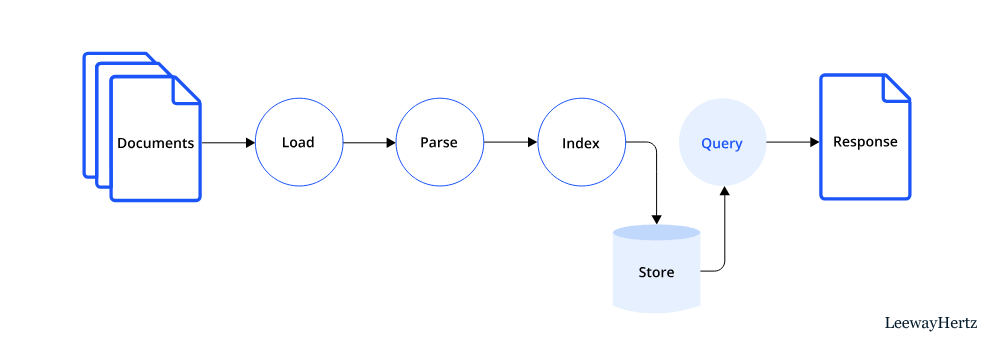


#### Key Feature of LlamaIndex:
*   Data connectors allow ingestion from various data sources and formats.
*   It can synthesize data from multiple documents or heterogeneous data sources.
* It provides numerous integrations with vector stores, ChatGPT plugins, tracing tools, LangChain, and more.





1. Install required libraries

In [1]:
!pip install llama-index
!pip install openai
!pip install pandas
!pip install tqdm
%pip install llama-index-postprocessor-cohere-rerank
%pip install torch sentence-transformers
%pip install diskcache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.4/187.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing install

2. Import required libraries

In [2]:
import pandas as pd
from llama_index.core import SimpleDirectoryReader , VectorStoreIndex, Document, ServiceContext
from llama_index.core.node_parser import SimpleNodeParser
import openai
from tqdm import tqdm
from google.colab import userdata
from llama_index.core.evaluation import generate_question_context_pairs
from llama_index.postprocessor.cohere_rerank import CohereRerank
from llama_index.core.postprocessor import SimilarityPostprocessor
from llama_index.core.postprocessor import SentenceTransformerRerank
from llama_index.core.evaluation import (
    CorrectnessEvaluator,
    FaithfulnessEvaluator,
    RelevancyEvaluator,
)
import re

In [3]:
import nest_asyncio

nest_asyncio.apply()

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Initialize OpenAI/Cohere with Key

In [8]:
#Read the API keys from userdata in collab.
openai.api_key = userdata.get('OPENAI_API_KEY')
# cohere_api_key = userdata.get('cohere_key')

4. Loading pdf as document using SimpleDirectoryReader


In [9]:
#Read all the pdfs from the below mention path.
reader = SimpleDirectoryReader(input_dir="/content/drive/Othercomputers/My Laptop/AI-ML/EPG - AIML/GEN AI/Vector DB and RAG", required_exts=[".pdf"])

documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 217 docs


5. Parsing document into nodes

In [10]:
# Initialize the parser and parse the documents into nodes
parser = SimpleNodeParser.from_defaults()

# Using tqdm to show progress for document parsing
nodes = []
for doc in tqdm(documents, desc="Parsing documents"):
    nodes.extend(parser.get_nodes_from_documents([doc]))

Parsing documents: 100%|██████████| 217/217 [00:00<00:00, 628.40it/s]


6. Generating vector index for the nodes

In [11]:
# Using tqdm to show progress for indexing
index = VectorStoreIndex(nodes)

7. Initialize Query engine

In [ ]:
#Using Cohere Rerank
# cohere_rerank = CohereRerank(api_key=cohere_api_key, top_n=3)

In [12]:
#Using SentenceTransformer Rerank
rerank = SentenceTransformerRerank(
    model="cross-encoder/ms-marco-MiniLM-L-2-v2", top_n=3
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.5M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
# customizing the prompts.
from llama_index.core import PromptTemplate

text_qa_template_str = (
    "Context information is"
    " below.\n---------------------\n{context_str}\n---------------------\nUsing"
    " both the context information and also using your own knowledge, answer"
    " the question: {query_str}\nIf the context isn't helpful, you can also"
    " answer the question on your own.\n"
)
text_qa_template = PromptTemplate(text_qa_template_str)


refine_template_str = (
    "The original question is as follows: {query_str}\nWe have provided an"
    " existing answer: {existing_answer}\nWe have the opportunity to refine"
    " the existing answer (only if needed) with some more context"
    " below.\n------------\n{context_msg}\n------------\nUsing both the new"
    " context and your own knowledge, update or repeat the existing answer.\n"
)
refine_template = PromptTemplate(refine_template_str)

In [14]:
# Create the query engine from the index
from llama_index.llms.openai import OpenAI
gpt35_llm = OpenAI(model="gpt-3.5-turbo", max_tokens=256)
gpt4_llm = OpenAI(model="gpt-4", max_tokens=256)

query_engine = index.as_query_engine(
     similarity_top_k=10,
        node_postprocessors=[rerank],
        text_qa_template=text_qa_template,
        refine_template=refine_template,
        llm=gpt35_llm
)


In [15]:
from IPython.display import display, HTML
# Query the engine.
response = query_engine.query("What are the exclusions applicable to accidental death benefits in the policy?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

In [16]:
dir(response)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_formatted_sources',
 'metadata',
 'response',
 'source_nodes']

In [17]:
response.metadata

{'7730bdac-0087-4e75-aa14-69673dbff41b': {'page_label': '15',
  'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf',
  'file_path': '/content/drive/Othercomputers/My Laptop/AI-ML/EPG - AIML/GEN AI/Vector DB and RAG/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf',
  'file_type': 'application/pdf',
  'file_size': 1371541,
  'creation_date': '2024-09-23',
  'last_modified_date': '2023-09-29'},
 '22c96717-55d2-413b-9054-9a11ea767f34': {'page_label': '4',
  'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf',
  'file_path': '/content/drive/Othercomputers/My Laptop/AI-ML/EPG - AIML/GEN AI/Vector DB and RAG/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf',
  'file_type': 'application/pdf',
  'file_size': 1371541,
  'creation_date': '2024-09-23',
  'last_modified_date': '2023-09-29'},
 '2614a2c3-db07-4508-838b-50556af4b236': {'page_label': '7',
  'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Do

In [18]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='7730bdac-0087-4e75-aa14-69673dbff41b', embedding=None, metadata={'page_label': '15', 'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_path': '/content/drive/Othercomputers/My Laptop/AI-ML/EPG - AIML/GEN AI/Vector DB and RAG/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_type': 'application/pdf', 'file_size': 1371541, 'creation_date': '2024-09-23', 'last_modified_date': '2023-09-29'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='d9e5e23e-1e8e-48f1-9683-ca118f0dd2de', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '15', 'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', '

In [19]:
len(response.source_nodes)

3

In [20]:
print(response.source_nodes[0].node.metadata['file_name'])
print(response.source_nodes[0].node.metadata['page_label'])

HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
15


In [21]:
# Extract the score
print(response.source_nodes[0].score)

4.735873


In [22]:
# Response Node Text
response.source_nodes[0].node.text

'Page 15 of 31 \n  \nNote: For the purpose of waiting period, Date of commencement or inception of coverage for a benefit option \nshall mean the date from which the member is covered under that benefit option. \n \niv. Accidental Death Benefit Exclusions: \n1. No Accidental Death Benefit will be payable if the death of the Scheme Members occurs after 180 days \nfrom the date of Accident. \nSpecific Exclusions for this benefit are listed below \nWe will not pay Accidental Death Benefit, if Accidental Death is caused from or due to  any of the \nfollowing:  \n\uf0b7 Intentionally self-inflicted injury or suicide while sane or insane \n\uf0b7 Alcohol or Solvent abuse or taking of Drugs, narcotics or psychotropic substances unless taken in \naccordance with the lawful directions and prescription of a registered medical practitioner. \n\uf0b7 Engaging in or taking part in professional sport(s) or any hazardous pursuits, power boat racing, sky \ndiving, para gliding, parachuting, scuba divi

In [23]:
print(response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label'])

HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf Page No 15


Step 8. Generating Evaluators

In [24]:
# Pass the LLM directly to the evaluator (or use any other necessary args)
faithfulness_gpt4 = FaithfulnessEvaluator(llm=gpt4_llm)
relevancy_gpt4 = RelevancyEvaluator(llm=gpt4_llm)
correctness_gpt4 = CorrectnessEvaluator(llm=gpt4_llm)

Step 9: Creating response pipeline


In [25]:
import openai
import diskcache as dc

#Using disk cache
cache = dc.Cache('./gpt_cache')

In [26]:
# Query response function
def query_response(user_input):
    final_response=""
    cache_response=None
    cache_response=cache.get(user_input)
    if cache_response is None:
      response=query_engine.query(user_input)
      faithfulness_result = faithfulness_gpt4.evaluate_response(response=response)
      relevancy_result = relevancy_gpt4.evaluate_response(query=user_input, response=response)
      correctness_result = correctness_gpt4.evaluate_response(
        query=user_input,
        response=response,
        )
      print("Answer from LLM:")
      file_name = response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label'] + "\n"
      response = response.response + '\nSimilarity score is :' + str(response.source_nodes[0].score) + "\n" + f"Faithfulness Score: {faithfulness_result.score}\n" + f"Relevancy Score: {relevancy_result.score}\n" + f"Correctness Score: {correctness_result.score}\n" + '\nCheck further for document references at ' + file_name
      cache.set(user_input, response)
      final_response=response
    else:
      print("Answer  from cache:")
      final_response=cache_response

    return final_response

In [27]:
#Dynamic question answering function.
def initialize_conv():
  print("Feel free to ask questions related to insurance policies. Enter exit once you are done!")
  while True:
    user_input=input()
    if user_input.lower() == "exit":
      print("Exiting the program. Bye!!!")
      break
    else:
      response=query_response(user_input)
      print(response)

In [29]:
initialize_conv()

Feel free to ask questions related to insurance policies. Enter exit once you are done!
Explain the significance of nomination in the insurance policy as per the provisions of the Insurance Act, 1938.
Answer from LLM:
Nomination in an insurance policy is a crucial aspect as per the provisions of the Insurance Act, 1938. It allows the policyholder to designate a person or persons who will receive the money secured by the policy in the event of the policyholder's death. This ensures that the intended beneficiaries receive the financial benefits of the policy without any ambiguity or dispute.

The significance of nomination can be summarized as follows:
1. Clarity and certainty: By nominating specific individuals, the policyholder ensures that there is clarity on who will receive the benefits of the policy. This helps in avoiding any confusion or disputes among potential claimants.

2. Protection for minors: In cases where the nominee is a minor, the policyholder can appoint a trusted ind

Step 10: Building a test pipeline

In [30]:
#Set of questions to be passed to the testing_pipeline.
questions=["What are the different types of surgeries listed in the context information, and can you provide an example of each type of surgery?",
           "What are the benefits payable under the Extra Life Option in the event of the Scheme Member's death?",
           "What are the options available to the policyholder if they are not agreeable to any of the terms and conditions stated in the Policy within the free-look period?"]

#Extra Set of questions.
# questions=["What are the specific types of complaints or disputes that the Ombudsman can receive and consider according to the document provided?",
#            "What are the different options available for the Guaranteed Benefit Option in the HDFC Life Sampoorna Jeevan Plan?",
#            "What are the options available to the policyholder in case of discontinuance of the policy after the lock-in period for other than single premium policies?",
#            "What is the definition of "Grace Period" in the terms and conditions of the HDFC Life Smart Pension Plan?",
#            "Explain the significance of nomination in the insurance policy as per the provisions of the Insurance Act, 1938.",
#            "What are the steps involved in making a complaint to the Insurance Ombudsman according to the information provided in the document?",
#            "What are the specific types of complaints or disputes that the Ombudsman can receive and consider according to the document provided?",
#            "How does the Systematic Transfer Strategy work in HDFC Life Smart Pension Plan, and what are the conditions for opting out of this strategy?"]

In [32]:
import pandas as pd
pattern = r'Faithfulness Score:\s*(\d+\.\d+)|Relevancy Score:\s*(\d+\.\d+)|Correctness Score:\s*(\d+\.\d+)'

def testing_pipeline(questions):
  test_feedback=[]
  for i in questions:
    print(f"Question : {i}")
    response = query_response(i)
    # Find all matches
    matches = re.findall(pattern, response)
    faithfulness, relevancy, correctness = [float(next(filter(None, match))) for match in matches]
    print(f'Answer : {response}')
    print("\nPlease provide your feedback on the response provided by bot")
    user_input=input()
    page=response.split()[-1]
    test_feedback.append((i,response,page,user_input,faithfulness,relevancy,correctness))

  feedback_df=pd.DataFrame(test_feedback,columns=["Question","Response","Page","Good/Bad","Faithfulness","Relevancy","Correctness"])
  return feedback_df

In [33]:
testing_pipeline(questions)

Question : What are the different types of surgeries listed in the context information, and can you provide an example of each type of surgery?
Answer from LLM:
Answer : The context information provides a list of surgeries divided into four categories based on severity. Here are some examples of surgeries from each category:

Category 1 - Surgeries (100% of the Sum Insured Payable):
1. Surgery of the Aorta
2. CABG (Coronary Artery Bypass Graft) via open thoracotomy
3. Prosthetic replacement of Heart Valve
4. Heart/Heart-Lung Transplant

Category 2 - Surgeries (60% of the Sum Insured Payable):
1. Pericardiotomy / Pericardectomy
2. Permanent pacemaker Implantation in heart
3. Mitral valve repair
4. Aortic valve repair

These are just a few examples of the surgeries listed in the context information. Each surgery is specific to a certain medical condition or procedure and may require different levels of expertise and resources to perform.
Similarity score is :-3.5890374
Faithfulness Score

,Question,Response,Page,Good/Bad,Faithfulness,Relevancy,Correctness
0,What are the different types of surgeries list...,The context information provides a list of sur...,27,Good,1.0,1.0,5.0
1,What are the benefits payable under the Extra ...,"Under the Extra Life Option, in the event of t...",7,Good,1.0,1.0,4.5
2,What are the options available to the policyho...,If the policyholder is not agreeable to any of...,11,Good,1.0,1.0,5.0


### **Building a custom promt template**


In [34]:
response=query_engine.query("What is the definition of \"Grace Period\" in the terms and conditions of the HDFC Life Smart Pension Plan?")
response.response

'In the terms and conditions of the HDFC Life Smart Pension Plan, the "Grace Period" is defined as the time granted by the company from the due date for the payment of Premium, without any penalty or late fee. During this period, the Policy is considered to be in force with the risk cover without any interruption, as per the terms and conditions of the Policy. The Grace Period for payment of the Premiums is fifteen days for monthly premium payments and thirty days for all other cases.'

In [35]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='27cb6e88-649e-4c69-be6b-a69930f45d10', embedding=None, metadata={'page_label': '5', 'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_path': '/content/drive/Othercomputers/My Laptop/AI-ML/EPG - AIML/GEN AI/Vector DB and RAG/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_type': 'application/pdf', 'file_size': 983547, 'creation_date': '2024-09-23', 'last_modified_date': '2023-09-29'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='81e4dbce-6d9f-4268-a174-5b31bcb03708', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '5', 'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_path': '/content/dr

In [36]:
reference_0 = " Check further at " + response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label']
reference_1 = " Check further at " + response.source_nodes[1].node.metadata['file_name'] + " Page No " + response.source_nodes[1].node.metadata['page_label']
retrieved = response.source_nodes[0].node.text + reference_0 + response.source_nodes[1].node.text + reference_1
retrieved

'HDFC  Life Smart Pension Plan 101L164V02  – Terms and Conditions  (Direct & \nOnline Sales)  \n(A Unit Linked Non -Participating Individual Pension Plan)   \n  Page 5 of 37  \n \n\uf0b7 When one or more stock exchanges which provide a basis for valuation of the assets of the fund are closed \notherwise than for ordinary holidays.  \n\uf0b7 When, as a result of political, economic, monetary or any circumstances which are not in the control of the \ninsurer, the disposal of the assets of the fund would be detrimental to the interests of the continuing \nPolicyholders.  \n\uf0b7 In the event of natural calamities, strikes, war, civil unrest, riots and bandhs.  \n\uf0b7 In the event of any Force Majeure or disaster that affects the normal functioning of the Company . \n \n15. Fund Value  means the  total value of the units at a point of time in a Segregated Fund i.e. total number of units \nunder a policy multiplied by the Net Asset Value (NAV) per unit of that  fund. \n \n16. Grace Perio

In [37]:
#Custom Prompt.
messages=[
          {
              "role":"system",
              "content":"You are AI assistent to user. Provide the brief summary with respect to the retrived context."
          },
          {
              "role":"user",
              "content": f"""What is the definition of \"Grace Period\" in the terms and conditions of the HDFC Life Smart Pension Plan? Check in '{retrieved}'
              """
          }
        ]
messages

[{'role': 'system',
  'content': 'You are AI assistent to user. Provide the brief summary with respect to the retrived context.'},
 {'role': 'user',
  'content': 'What is the definition of "Grace Period" in the terms and conditions of the HDFC Life Smart Pension Plan? Check in \'HDFC  Life Smart Pension Plan 101L164V02  – Terms and Conditions  (Direct & \nOnline Sales)  \n(A Unit Linked Non -Participating Individual Pension Plan)   \n  Page 5 of 37  \n \n\uf0b7 When one or more stock exchanges which provide a basis for valuation of the assets of the fund are closed \notherwise than for ordinary holidays.  \n\uf0b7 When, as a result of political, economic, monetary or any circumstances which are not in the control of the \ninsurer, the disposal of the assets of the fund would be detrimental to the interests of the continuing \nPolicyholders.  \n\uf0b7 In the event of natural calamities, strikes, war, civil unrest, riots and bandhs.  \n\uf0b7 In the event of any Force Majeure or disaster

In [38]:
response2=openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages
)
response2.choices[0].message.content

'In the HDFC Life Smart Pension Plan, the "Grace Period" is defined as the time period granted by the company from the due date for the payment of premium without any penalty or late fee, during which the policy is considered to be in force with the risk cover without any interruption. The grace period for payment of premiums is fifteen days for monthly payments and thirty days for other payment frequencies.'

### **Using customized nodes and LLMs in LLAMA Index**


In [39]:

#import OpenAIEmbedding
from llama_index.embeddings.openai import OpenAIEmbedding
#import SentenceSplitter
from llama_index.core.node_parser import SentenceSplitter
#import OpenAI
from llama_index.llms.openai import OpenAI
#import Settings
from llama_index.core import Settings

#Initialize the openAI model
Settings.lm=OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=256)

#Initialize the embedding model
Settings.embed_model=OpenAIEmbedding()

#Initialize the node_parser with custom node settings
Settings.node_parser=SentenceSplitter(chunk_size=512, chunk_overlap=20)

# Initialize the num_output and context window
Settings.num_output=512
Settings.context_window=3900

#Create a VectorStoreIndex from a list of documents using the service context
index=VectorStoreIndex.from_documents(documents)

# Initialize a query engine for the index with a specified similiarity with top-k values
query_engine=index.as_query_engine(similarity_top_k=3)

In [40]:
#Query the engine with specific question
query = "What are the exclusions applicable to accidental death benefits in the policy?"
response=query_engine.query(query)

In [41]:
response.response

'The exclusions applicable to accidental death benefits in the policy include:\n- Intentionally self-inflicted injury or suicide while sane or insane\n- Alcohol or Solvent abuse or taking of Drugs, narcotics or psychotropic substances unless taken in accordance with the lawful directions and prescription of a registered medical practitioner\n- Engaging in or taking part in professional sport(s) or any hazardous pursuits\n- War, invasion, hostilities, civil war, rebellion, revolution, or taking part in a riot or civil commotion\n- Taking part in any flying activity, other than as a passenger in a commercially licensed aircraft\n- Participation in a criminal or unlawful act.'